# Analisis Biplot

### Set default directory

In [2]:
setwd('D:/DATA/Desktop/GitHub/Biplot')

### Baca data, sesuaikan separator sama decimal sesuai settingan excel di laptop masing2

In [4]:
data<-read.table(file.choose(),header=TRUE, sep=";", fill=TRUE, dec=",")
head(data)

Code,Sector,Series,Movie,Entertainment,Children,Information,News,Religious,Sport,Special,Filler
A,FOOD,0.21,0.16,0.13,0.15,0.12,0.17,0.02,0.01,0,0.02
B,BEVERAGES,0.20,0.15,0.14,0.12,0.13,0.18,0.02,0.03,0,0.02
C,SMOKING & ACC,0.22,0.32,0.15,0.00,0.06,0.15,0.00,0.08,0,0.01
D,BABY & MATERNITY,0.21,0.17,0.10,0.25,0.09,0.14,0.02,0.01,0,0.01
E,MEDICINES/PHARMACEUTICALS,0.20,0.10,0.09,0.09,0.15,0.27,0.03,0.02,0,0.04
F,TOILETRIES & COSMETICS,0.20,0.21,0.14,0.13,0.12,0.15,0.02,0.03,0,0.01


### Subset data (buang nama kolom dan baris)

In [6]:
matriks<-as.matrix.data.frame(data[,3:11]) ##Membuang kolom pertama
class(matriks)
head(matriks)
nrow(matriks)

[1] "matrix"

Series,Movie,Entertainment,Children,Information,News,Religious,Sport,Special
0.21,0.16,0.13,0.15,0.12,0.17,0.02,0.01,0
0.20,0.15,0.14,0.12,0.13,0.18,0.02,0.03,0
0.22,0.32,0.15,0.00,0.06,0.15,0.00,0.08,0
0.21,0.17,0.10,0.25,0.09,0.14,0.02,0.01,0
0.20,0.10,0.09,0.09,0.15,0.27,0.03,0.02,0
0.20,0.21,0.14,0.13,0.12,0.15,0.02,0.03,0


[1] 20

### Buat label (nama observasi dan nama variabel)

In [7]:
xlabel<-data[1:20,1]  ##Ambil kolom pertama untuk nama observasi
ylabel<-colnames(data[,3:11])

### Single Value Decomposition

In [8]:
y<-svd(matriks)
U<-y$u
L<-diag(y$d)
A<-y$v

### Matriks G H untuk biplot

In [9]:
G<-U%*%sqrt(L)
Ht<-L%*%t(A)
H<-t(Ht)
G2<-G[,1:2]
H2<-H[,1:2]

### Cek besar keragaman yang mampu dijelaskan biplot (baiknya > 70%)

In [10]:
cek<-eigen(t(matriks)%*%matriks)$values
dim1<-sum(cek[1])/sum(cek)*100
dim2<-sum(cek[2])/sum(cek)*100
dim1+dim2

[1] 94.75072

### Buat keterangan di sumbu x dan y tenatang keragaman

In [11]:
xlab<-paste("Dimension 1(",round(dim1,2),"%)")
ylab<-paste("Dimension 2(",round(dim2,2),"%)")

### Buat biplot

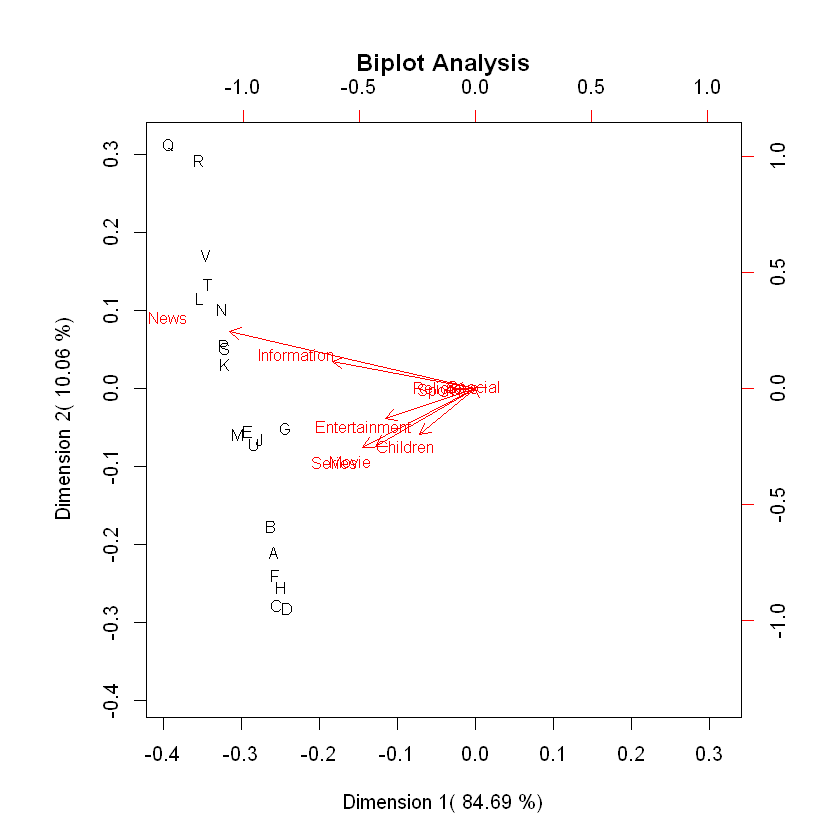

In [12]:
biplot (G2, H2, xlabs=xlabel, ylabs = ylabel, cex=0.8, main="Biplot Analysis", xlab = xlab, ylab=ylab)

### Export ke jpeg

In [13]:
png(file="biplot.png",width=800,height=750,res=100)
biplot(G2, H2, xlabs=xlabel, ylabs = ylabel, cex=0.8, main="Biplot Analysis", xlab = xlab, ylab=ylab)
abline(h=0)
abline(v=0)

# Extras

### Matirks var covar (analisa keragaman alias panjang panah di biplot)

In [14]:
var<-H%*%t(H)
sqrt(diag(var))
cov2cor(var)

[1] 0.69209826 0.64140471 0.52668776 0.44966654 0.82861330 1.36696745 0.18083141
[8] 0.19544820 0.01732051

1.0000000,0.9616704,0.9445306,0.8302984,0.7290554,0.7538508,0.5888787,0.7762290,0.2669449
0.9616704,1.0000000,0.9214966,0.7343502,0.6843200,0.7090724,0.5147168,0.8200291,0.2160322
0.9445306,0.9214966,1.0000000,0.7617154,0.8207681,0.8151785,0.7192228,0.8179508,0.3398191
0.8302984,0.7343502,0.7617154,1.0000000,0.5450890,0.5253144,0.6222803,0.4835782,0.1283952
0.7290554,0.6843200,0.8207681,0.5450890,1.0000000,0.9097832,0.6727206,0.7860403,0.3483834
0.7538508,0.7090724,0.8151785,0.5253144,0.9097832,1.0000000,0.6755919,0.8256874,0.5195009
0.5888787,0.5147168,0.7192228,0.6222803,0.6727206,0.6755919,1.0000000,0.6790561,0.3512030
0.7762290,0.8200291,0.8179508,0.4835782,0.7860403,0.8256874,0.6790561,1.0000000,0.3249379
0.2669449,0.2160322,0.3398191,0.1283952,0.3483834,0.5195009,0.3512030,0.3249379,1.0000000


### Matriks jarak euclid (analisa jarak dari tiap posisi observasi)

In [15]:
euclid<-G%*%t(G)
euclid

0.12233086,0.10996581,0.092988578,0.13794409,0.10073230,0.11608839,0.07079862,0.12420658,0.08501370,0.06016675,0.07341833,0.09193667,0.05475739,0.07150245,0.039137196,0.03742676,0.05912434,0.06137606,0.09141475,0.05245201
0.10996581,0.10857340,0.096404226,0.11347379,0.09497269,0.10615624,0.07391824,0.11082087,0.09141639,0.07128129,0.07227632,0.09896805,0.06936392,0.06868113,0.044654348,0.04870857,0.06777219,0.05975112,0.09751930,0.05468406
0.09298858,0.09640423,0.280279720,0.06720930,0.06209837,0.13987946,0.02145221,0.09324050,0.08988181,0.12204986,0.04947652,0.10909181,0.06557439,0.08375722,0.008240775,-0.01650327,0.10588033,0.04781661,0.08890578,0.04275949
0.13794409,0.11347379,0.067209302,0.20817515,0.09203085,0.13113590,0.08520024,0.17330672,0.06258199,0.05024802,0.06200523,0.06266021,0.02841107,0.05728590,0.026581538,0.01780856,0.05679692,0.05257309,0.06401723,0.03959306
0.10073230,0.09497269,0.062098373,0.09203085,0.13218663,0.07938015,0.07001447,0.08217036,0.07274547,0.08750580,0.11755289,0.10827654,0.07000568,0.08319422,0.095120234,0.08396213,0.08842529,0.07991019,0.07745833,0.09676314
0.11608839,0.10615624,0.139879459,0.13113590,0.07938015,0.12910464,0.06726981,0.12606769,0.09066228,0.06870836,0.05282707,0.08836988,0.05812624,0.07933956,0.025162462,0.03553331,0.06738796,0.05847116,0.09409026,0.04451227
0.07079862,0.07391824,0.021452213,0.08520024,0.07001447,0.06726981,0.20188805,0.08338486,0.07850111,0.06303137,0.06494308,0.05217333,0.09036428,0.06472688,0.056874418,0.06960285,0.06144502,0.08662686,0.06959685,0.08962314
0.12420658,0.11082087,0.093240500,0.17330672,0.08217036,0.12606769,0.08338486,0.15410717,0.07452010,0.06426123,0.05883849,0.07287835,0.04686481,0.06104107,0.029813980,0.02531124,0.06619457,0.05454373,0.07593516,0.04224509
0.08501370,0.09141639,0.089881806,0.06258199,0.07274547,0.09066228,0.07850111,0.07452010,0.11395535,0.06634877,0.06339491,0.09951914,0.10106507,0.09526355,0.071596084,0.11105701,0.06535837,0.08338093,0.12147998,0.06893370
0.06016675,0.07128129,0.122049856,0.05024802,0.08750580,0.06870836,0.06303137,0.06426123,0.06634877,0.15004118,0.13674582,0.09769291,0.10775338,0.09015221,0.148231593,0.07567949,0.14035943,0.11272560,0.06210302,0.12624060
0.07341833,0.07227632,0.049476518,0.06200523,0.11755289,0.05282707,0.06494308,0.05883849,0.06339491,0.13674582,0.20027863,0.09868539,0.12206803,0.09533170,0.202341428,0.07361972,0.12337840,0.15238796,0.06587325,0.16583554
